# UCK 358E – Introduction to Artificial Intelligence 
## Homework 2
## Deadline: May 12, 2024




#### Name: İbrahim Enes Baloğlu
#### Student Number: 110200122

### In this homework, you will focus on predicting type of trees in a forest. There are 7 different tree types in the dataset, the label is named as "Cover_Type" and you will train models to predict the correct type for the test data. Each section below contains clear explanations about the tasks. It is not required to write a separate report for the homework. Make all of your explanations and discussions inside the Jupiter Notebook. Use the Notebook as your report. Be aware that If you deliver a Notebook containing only codes without explanation and discussion, you will lose majority of your points. 

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
%matplotlib inline
from scipy import optimize
from scipy.io import loadmat
import keras
from tqdm import tqdm
from scipy.special import logsumexp
from sklearn.preprocessing import StandardScaler
## import any library that you will use
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score


# Load Data (don't change anything in this part, just run it) 

In [2]:
df = pd.read_csv("datasetHW.csv")
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [3]:
df.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [4]:
df_new = df[["Elevation", "Hillshade_9am", "Horizontal_Distance_To_Hydrology", "Horizontal_Distance_To_Fire_Points", "Cover_Type"]]
X = df_new.drop(["Cover_Type" ], axis=1)
y = df_new[["Cover_Type"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # don't change random state

In [5]:
X_train

,Elevation,Hillshade_9am,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points
765,2916,202,67,1507
5927,2356,247,210,1050
14032,2977,195,696,878
6187,2415,131,108,638
3872,2299,167,497,1159
...,...,...,...,...
5191,2189,254,0,525
13418,2317,229,0,560
5390,2962,237,95,470
860,2898,204,30,1552


In [6]:
filter_col = [col for col in df if col.startswith('Soil_Type')]
filter_col.extend(["Elevation", "Hillshade_9am", "Horizontal_Distance_To_Hydrology", "Horizontal_Distance_To_Fire_Points"])
df2 = df.loc[(df['Cover_Type'] == 1) | (df['Cover_Type'] == 3) ]
X2 = df2[filter_col]
y2 = df2[["Cover_Type"]]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42) # don't change random state

In [7]:
X_train2

,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Elevation,Hillshade_9am,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points
2701,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,2047,89,228,42
2056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,3341,184,424,1809
7093,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2651,217,470,1124
5778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3114,180,474,3206
10341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3164,226,150,1262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12092,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2081,244,175,488
1799,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3241,217,0,2012
11119,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,2510,228,319,180
13509,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,2401,146,210,569


In [8]:
y_train2

,Cover_Type
2701,3
2056,1
7093,3
5778,1
10341,1
...,...
12092,3
1799,1
11119,3
13509,3


## <font color='red'>  In part a and part b, use (X_train, y_train) for training and (X_test, y_test) for testing your model. Don't use (X_test, y_test) during training or validation. </font>

## <font color='red'> In part c, use (X_train2) for training and (X_test2, y_test2) for testing your model. X_train2 contains both continues and categorical features. </font>

## Part a) Train SVM model with the first training set (X_train). Try to figure out whether there is overfitting or underfitting. Define the required preprocesses and feature engineering approaches to obtain the best accuracy for the test set (X_test). Plot confusion matrix, present your results and discuss your findings. (You are free to use sklearn in this part) 

In [ ]:
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

c:\Users\enes\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5970017636684304

In [17]:
scaler=StandardScaler()
X_train_n=scaler.fit_transform(X_train)
X_test_n=scaler.fit_transform(X_test)

##### When we try to train SVC using a linear kernel, we get an accuracy of 0.59, but the training process takes about 45 minutes, so it does not make sense to use a linear kernel in this data set.


c:\Users\enes\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\enes\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\enes\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\enes\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversio

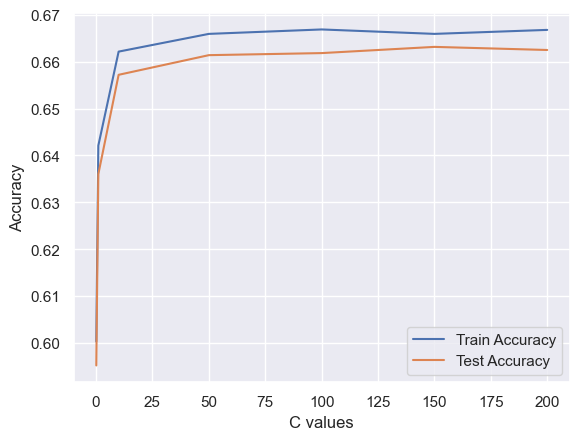

In [13]:
scores_test=[]
scores_train=[]
c=[0.1,1,10,50,100,150,200]
for i in c:
    SVMmodel=SVC(C=i,kernel='poly')
    SVMmodel.fit(X_train,y_train)
    SVMmodel.get_params()

    scores_train.append(SVMmodel.score(X_train_n,y_train))

    scores_test.append(SVMmodel.score(X_test_n,y_test))

plt.plot(c,scores_train,label="Train Accuracy")
plt.plot(c,scores_test,label="Test Accuracy")
plt.legend()
plt.xlabel("C values")
plt.ylabel("Accuracy")
plt.show()

##### Here we calculate the train and test accuracies of SVC models created with c values ​​ranging from 0.1 to 200 for the polynomial kernel where C values are the ​​regularization parameter. Afterwards, we plot the accuracy we obtained according to the changing c values ​​on the figure. From here we can observe that accuracy increases up to a certain level according to increasing C values. The values ​​obtained for the train and test data sets are very close to each other, so we do not observe any overfitting here.

c:\Users\enes\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\enes\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\enes\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\enes\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversio

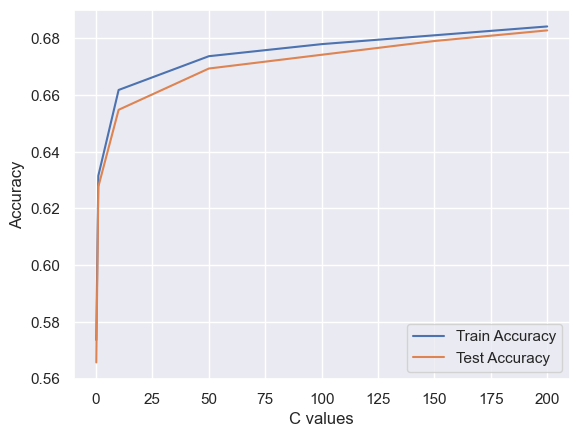

In [16]:
scores_test=[]
scores_train=[]
c=[0.1,1,10,50,100,150,200]
for i in c:
    SVMmodel=SVC(C=i,kernel='rbf')
    SVMmodel.fit(X_train,y_train)
    SVMmodel.get_params()

    scores_train.append(SVMmodel.score(X_train,y_train))

    scores_test.append(SVMmodel.score(X_test,y_test))
plt.plot(c,scores_train,label="Train Accuracy")
plt.plot(c,scores_test,label="Test Accuracy")
plt.legend()
plt.xlabel("C values")
plt.ylabel("Accuracy")
plt.show()

##### Using 'rbf' type kernel here the model was trained without normalizing the data. As can be seen, the difference between train and test accuracy values ​​is quite small. In addition, accuracy still tends to increase, albeit slightly, with increasing c.

c:\Users\enes\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\enes\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\enes\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\enes\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversio

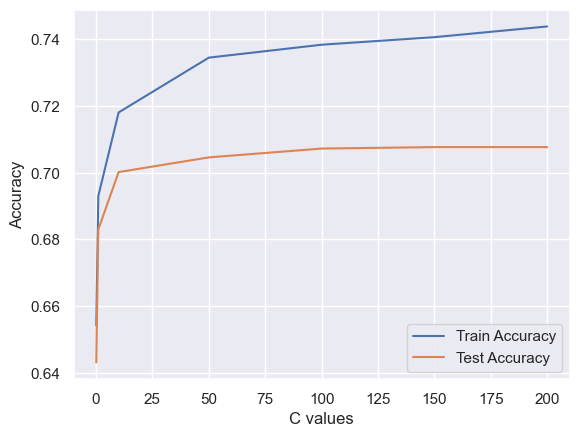

In [19]:
scores_test=[]
scores_train=[]
c=[0.1,1,10,50,100,150,200]
for i in c:
    SVMmodel=SVC(C=i,kernel='rbf')
    SVMmodel.fit(X_train_n,y_train)
    SVMmodel.get_params()

    scores_train.append(SVMmodel.score(X_train_n,y_train))

    scores_test.append(SVMmodel.score(X_test_n,y_test))
plt.plot(c,scores_train,label="Train Accuracy")
plt.plot(c,scores_test,label="Test Accuracy")
plt.legend()
plt.xlabel("C values")
plt.ylabel("Accuracy")
plt.show()

##### Again, when an SVC was trained by using the 'rbf' kernel and normalizing the data, it was observed that the SVC achieved higher accuracy at very low C values ​​compared to other model parameters. With the increase of C, train accuracy continued to increase at a slower pace, but test accuracy remained stable. This shows that we will reach overfitting at larger c values.

## Part b) Train NN models with the first training set (X_train). You will train NN models with different architectures. 

### b1) Train a NN model with a small network and train another one using a bigger network that contains at least 3 hidden layers. Try to figure out whether there is overfitting or underfitting. Define the required preprocesses and feature engineering approaches to obtain the best accuracy with the second model for the test set (X_test). Plot confusion matrix, present your results and discuss your findings. (You are free to use keras in part b1, don't use sklearn for NN training) 


In [22]:
# one hot encoding
y_test_n=y_test-1
y_train_n=y_train-1
y_tr_cat=keras.utils.to_categorical(y_train_n,num_classes=7)
y_tst_cat=keras.utils.to_categorical(y_test_n,num_classes=7)

#### <font color='green'> First Architecture

In [25]:
#creating the model
model=keras.Sequential([
    keras.Input(shape=(X_train_n.shape[1],)),#input layer
    keras.layers.Dense(32,activation='tanh'), #hidden layer with tanh function (tanh function helped to fast converge)
    keras.layers.Dense(7,activation='softmax') #output layer with softmax (it is appropriate for multiclass classification)
    
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) #categorical crossentropy is appropriate to use for multilabeled data

# training the model
model.fit(X_train_n, y_tr_cat, epochs=20, batch_size=32, validation_split=0.1) #10 percent of train data used for validation

# evaluation of the model on test data
loss, accuracy = model.evaluate(X_train_n, y_tr_cat)
print(f'Train Loss: {loss}, Train Accuracy: {accuracy}')

# evaluation of the model on test data
loss, accuracy = model.evaluate(X_test_n, y_tst_cat)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Epoch 1/20
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2754 - loss: 1.8490 - val_accuracy: 0.4599 - val_loss: 1.3342
Epoch 2/20
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5065 - loss: 1.2597 - val_accuracy: 0.5099 - val_loss: 1.1470
Epoch 3/20
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.5496 - loss: 1.1016 - val_accuracy: 0.5647 - val_loss: 1.0472
Epoch 4/20
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5784 - loss: 1.0172 - val_accuracy: 0.5760 - val_loss: 0.9911
Epoch 5/20
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6128 - loss: 0.9532 - val_accuracy: 0.5817 - val_loss: 0.9603
Epoch 6/20
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6170 - loss: 0.9276 - val_accuracy: 0.5883 - val_loss: 0.9378
Epoch 7/20
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6232 - loss: 0.9005 - val_accuracy: 0.5958 - val_loss: 0.9229
Epoch 8/20
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.6177 - loss: 0.8978 - val_accuracy

##### The accuracy value obtained in the model, which has 32 neurons in only 1 hidden layer in addition to the input and output layers, is 0.65 for the test and train data. We cannot see any overfitting here. It can be said that this is the capacity of the model.

#### <font color='green'> Second Architecture

Epoch 1/100
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4838 - loss: 1.2919 - val_accuracy: 0.5798 - val_loss: 0.9588
Epoch 2/100
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6164 - loss: 0.9206 - val_accuracy: 0.6147 - val_loss: 0.9008
Epoch 3/100
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6500 - loss: 0.8386 - val_accuracy: 0.6346 - val_loss: 0.8513
Epoch 4/100
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6539 - loss: 0.8189 - val_accuracy: 0.6525 - val_loss: 0.8404
Epoch 5/100
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6623 - loss: 0.7973 - val_accuracy: 0.6619 - val_loss: 0.8265
Epoch 6/100
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6631 - loss: 0.7906 - val_accuracy: 0.6676 - val_loss: 0.8157
Epoch 7/100
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6528 - loss: 0.7947 - val_accuracy: 0.6752 - val_loss: 0.8049
Epoch 8/100
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6817 - loss: 0.7492 - val_accu

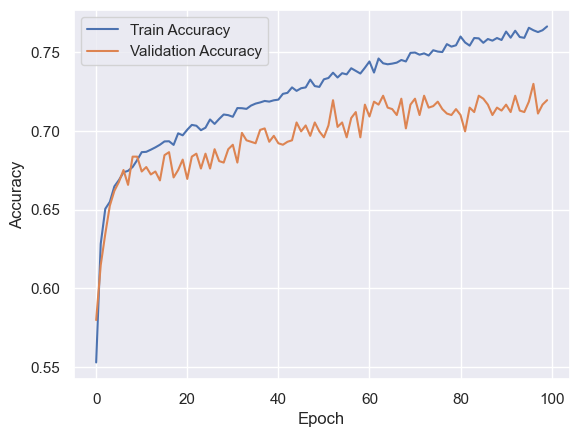

In [35]:
#creating the model
model=keras.Sequential([
    keras.Input(shape=(X_train_n.shape[1],)),
    keras.layers.Dense(128,activation='tanh'),
    keras.layers.Dense(64,activation='tanh'),
    keras.layers.Dense(32,activation='tanh'),
    keras.layers.Dense(7,activation='sigmoid')
    
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# training the model
history=model.fit(X_train_n, y_tr_cat, epochs=100, batch_size=32, validation_split=0.1)
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
# evaluation of the model on test data
loss, accuracy = model.evaluate(X_test_n, y_tst_cat)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

#plot of train and validation accuracy by epoch
plt.plot(train_accuracy,label="Train Accuracy")
plt.plot(val_accuracy,label="Validation Accuracy")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

##### I tried many different models for this data set, but the highest accuracy I could get was around 0.72. In different architectures, the model goes to overfitting. In this model, if I increased the number of epochs, it would be overfit.

### b2) Use the second architecture (which contains at least 3 hidden layers) and the preprocess that you defined in part b1, and train this neural network by developing your NN training algorithm from scratch without using any library. Compare your results with b1. (You can benefit from the codes available in ninova)


In [37]:
np.random.seed(42) #for more stable initialization (otherwise different results appear in different trials)
#MLP class used to create neural network layers
class MLP():
    
    def __init__(self, din, dout):
        self.W = (2 * np.random.rand(dout, din) - 1) * (np.sqrt(6) / np.sqrt(din + dout)) #initialize weights randomly (xavier-glorot initialization)
        self.b = (2 * np.random.rand(dout) - 1) * (np.sqrt(6) / np.sqrt(din + dout))     #initialize biases randomly   (xavier-glorot initialization)
        
    def forward(self, x): # x.shape = (batch_size, din)
        self.x = x # storing x for later (backward pass)
        return x @ self.W.T + self.b #forward propogation

    def backward(self, gradout):
        self.deltaW = gradout.T @ self.x 
        self.deltab = gradout.sum(0)
        return gradout @ self.W

In [38]:
#used to create multilayer neural networks and combine them
class SequentialNN():
    def __init__(self, blocks: list):
        self.blocks = blocks #takes layer as list
        
    def forward(self, x):
        
        for block in self.blocks: #travels through all layers
            x = block.forward(x) #output of each layer
        return x

    def backward(self, gradout):
        
        for block in self.blocks[::-1]: #travels through all layers by starting last layer
            gradout = block.backward(gradout) #outpout
            
        return gradout


In [39]:
# activation functions 
class ReLU():
    
    def forward(self, x):
        self.x = x
        return np.maximum(0, x)
    
    def backward(self, gradout):
        new_grad = gradout.copy()
        new_grad[self.x < 0] = 0.
        return new_grad
    
class Tanh():
    
    def forward(self, x):
        self.x = x
        return np.tanh(x)
    
    def backward(self, gradout):
        return gradout * (1 - np.tanh(self.x) ** 2)

class Sigmoid():
    
    def forward(self, x):
        self.sigmoid = np.where(x >= 0,
                                 1 / (1 + np.exp(-x)),
                                 np.exp(x) / (1 + np.exp(x)))
        return self.sigmoid
    
    def backward(self, gradout):
        return gradout * self.sigmoid * (1 - self.sigmoid)

class Softmax():
    
    def forward(self, x):
        self.x = x
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)
    
    def backward(self, gradout):
        softmax_output = self.forward(self.x)
        gradients = np.zeros_like(softmax_output)
        for i in range(softmax_output.shape[0]):
            softmax_matrix = softmax_output[i, :, None]
            jacobian_matrix = np.diagflat(softmax_matrix) - np.dot(softmax_matrix, softmax_matrix.T)
            gradients[i] = np.dot(jacobian_matrix, gradout[i])
        return gradients

    
class LogSoftmax():
    
    def forward(self, x):
        self.x = x
        return x - logsumexp(x, axis=1)[..., None]
    
    def backward(self, gradout):
        gradients = np.eye(self.x.shape[1])[None, ...]
        gradients = gradients - (np.exp(self.x) / np.sum(np.exp(self.x), axis=1)[..., None])[..., None]
        return (np.matmul(gradients, gradout[..., None]))[:, :, 0]


In [40]:
class NLLLoss():
    
    def forward(self, pred, true):
        self.pred = pred #predicted target
        self.true = true #true target
        
        loss = 0
        for b in range(pred.shape[0]):
            loss -= pred[b, true[b]] #negatif log loss calcualtion
        return loss

    def backward(self):
        din = self.pred.shape[1] #input dimension # batch_size x din 
        jacobian = np.zeros((self.pred.shape[0], din)) #create a matrix with shape of prediction
        for b in range(self.pred.shape[0]): #for all predictions
            jacobian[b, self.true[b]] = -1 #update jacobian

        return jacobian #gradient matrix 
    
    def __call__(self, pred, true):
        return self.forward(pred, true) #when NLLLoss called forward method will call automatically

In [54]:
# classical optimizer
class Optimizer():
    
    def __init__(self, lr, compound_nn: SequentialNN):
        self.lr = lr #learning rate
        self.compound_nn = compound_nn #neural network architecture
        
    def step(self):
        
        for block in self.compound_nn.blocks: #through all blocks of nn
            if block.__class__ == MLP:
                block.W = block.W - self.lr * block.deltaW #update weights
                block.b = block.b - self.lr * block.deltab #update biases

# adam optimizer                
class AdamOptimizer:
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.t = 0
        self.m = None
        self.v = None

    def step(self, parameters, gradients):
        if self.m is None:
            self.m = [np.zeros_like(param) for param in parameters] #first momentum initialization
            self.v = [np.zeros_like(param) for param in parameters] #second momentum initialization

        self.t += 1 #iteration
        lr_t = self.lr * np.sqrt(1 - self.beta2 ** self.t) / (1 - self.beta1 ** self.t) #learning rate update

        for i, (param, grad) in enumerate(zip(parameters, gradients)):
            self.m[i] = self.beta1 * self.m[i] + (1 - self.beta1) * grad #first moment update
            self.v[i] = self.beta2 * self.v[i] + (1 - self.beta2) * (grad ** 2) #second moment update

            m_hat = self.m[i] / (1 - self.beta1 ** self.t) #to update parameter
            v_hat = self.v[i] / (1 - self.beta2 ** self.t) #to update parameter

            param -= lr_t * m_hat / (np.sqrt(v_hat) + self.epsilon) #updating the weights and biases 


In [68]:
#training function 
def train(model, optimizer, trainX, trainy, loss_fct=NLLLoss(), nb_epochs=14000, batch_size=100):
    training_loss = [] #training loss array
    for epoch in tqdm(range(nb_epochs)): #tqdm used for visualization epoch process
        batch_idx = [np.random.randint(0, trainX.shape[0]) for _ in range(batch_size)] #random indexes of batch size
        x = trainX[batch_idx] #choose training data
        target = trainy[batch_idx] #chose target data

        prediction = model.forward(x) #prediction by forward propagtion
        loss_value = loss_fct(prediction, target) #loss calculation
        training_loss.append(loss_value) #loss history

        gradout = loss_fct.backward() #gradient calculation 
        model.backward(gradout) #model backpropagation

        # weight and bias values for all blocks (layers)
        parameters = [block.W for block in model.blocks if isinstance(block, MLP)] + \
                     [block.b for block in model.blocks if isinstance(block, MLP)]
        # gradients of wieghts and biases 
        gradients = [block.deltaW for block in model.blocks if isinstance(block, MLP)] + \
                    [block.deltab for block in model.blocks if isinstance(block, MLP)]

        #an optimizer used to update the weight and bias 

        optimizer.step(parameters,gradients)    #if you use adam optimizer
        #optimizer.step()   #if you use classical optimizer
        #!!!!!!!!!!!!!!!!!

    return training_loss

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
trainX = np.array(X_train)
trainy = np.array(y_train) - 1
testX = np.array(X_test)
testy = np.array(y_test) - 1

#### <font color='red'> Model 1

##### In the first model, the same architecture created in B1 and the classical optimizer were used. 

100%|██████████| 10584/10584 [00:06<00:00, 1755.74it/s]


Train accuracy 44.54837490551776 %
Test accuracy: 44.157848324514994 %


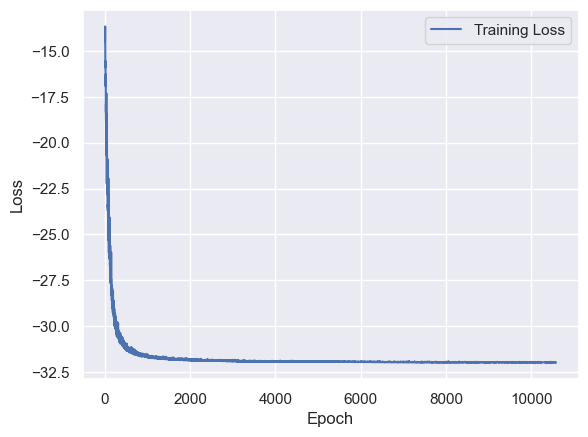

In [67]:
mlp = SequentialNN([MLP(4, 128), Tanh(), 
                        MLP(128, 64), Tanh(), 
                        MLP(64,32),Tanh(),
                        MLP(32, 7), Sigmoid()])
optimizer = Optimizer(1e-3,mlp)
training_loss = train(mlp, optimizer, trainX, trainy, batch_size=32, nb_epochs=trainX.shape[0])


# Compute train accuracy
accuracy = 0
pre=[]
for i in range(trainX.shape[0]):
    prediction = mlp.forward(trainX[i].reshape(1, -1)).argmax()
    pre.append(prediction)
    if prediction == trainy[i]: accuracy += 1
print('Train accuracy', accuracy / trainX.shape[0] * 100, '%')
# Compute test accuracy
accuracy = 0
for i in range(testX.shape[0]):
    prediction = mlp.forward(testX[i].reshape(1, -1)).argmax()
    if prediction == testy[i]:
        accuracy += 1
print('Test accuracy:', accuracy / testX.shape[0] * 100, '%')
#plot loss 
plt.plot(training_loss,label="Training Loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


#### <font color='red'> Model 2

In the second model, 'Adam' optimizer was selected. It has been observed that the and loss values ​​converge faster and without waves. and higher average accuracy was achieved.

100%|██████████| 10584/10584 [00:08<00:00, 1321.00it/s]


Train accuracy 47.656840513983376 %
Test accuracy: 45.98765432098765 %


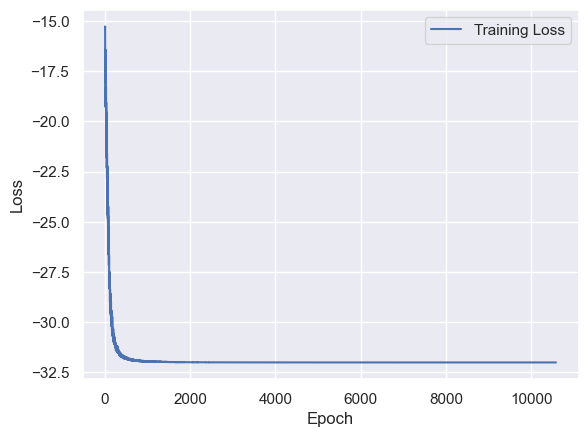

In [74]:
mlp = SequentialNN([MLP(4, 128), Tanh(), 
                        MLP(128, 64), Tanh(), 
                        MLP(64,32),Tanh(),
                        MLP(32, 7), Sigmoid()])
optimizer = AdamOptimizer(lr=1e-3)
training_loss = train(mlp, optimizer, trainX, trainy, batch_size=32, nb_epochs=trainX.shape[0])


# Compute train accuracy
accuracy = 0
pre=[]
for i in range(trainX.shape[0]):
    prediction = mlp.forward(trainX[i].reshape(1, -1)).argmax()
    pre.append(prediction)
    if prediction == trainy[i]: accuracy += 1
print('Train accuracy', accuracy / trainX.shape[0] * 100, '%')
# Compute test accuracy
accuracy = 0
for i in range(testX.shape[0]):
    prediction = mlp.forward(testX[i].reshape(1, -1)).argmax()
    if prediction == testy[i]:
        accuracy += 1
print('Test accuracy:', accuracy / testX.shape[0] * 100, '%')
#plot loss 
plt.plot(training_loss,label="Training Loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


#### <font color='red'> Model 3

In the 3rd model, the output function was replaced with softmax. The best result was achieved using the same optimization method.

In [59]:


mlp = SequentialNN([MLP(4, 128), Tanh(), 
                    MLP(128, 64), Tanh(), 
                    MLP(64,32),Tanh(),
                    MLP(32, 7), Softmax()])
optimizer = AdamOptimizer(1e-3)

training_loss = train(mlp, optimizer, trainX, trainy, batch_size=32, nb_epochs=trainX.shape[0])

# Compute train accuracy
accuracy = 0
pre=[]
for i in range(trainX.shape[0]):
    prediction = mlp.forward(trainX[i].reshape(1, -1)).argmax()
    pre.append(prediction)
    if prediction == trainy[i]: accuracy += 1
print('Train accuracy', accuracy / trainX.shape[0] * 100, '%')
# Compute test accuracy
accuracy = 0
for i in range(testX.shape[0]):
    prediction = mlp.forward(testX[i].reshape(1, -1)).argmax()
    if prediction == testy[i]:
        accuracy += 1

print('Test accuracy:', accuracy / testX.shape[0] * 100, '%')


100%|██████████| 10584/10584 [00:12<00:00, 866.74it/s]


Train accuracy 69.7845804988662 %
Test accuracy: 67.9453262786596 %


## Part c) This time, you have a different dataset with continues and categorical features (X_train2) to train unsupervised learning models. You need to train autoencoder and K-means, EM models. 

### c1) Train an autoencoder with 2 neurons in the latent space and more that 2 layers in the encoder/decoder, train another autoencoder with same architecture except there is 3 neurons in the latent space. Evaluate the performance of your models, and try to improve it. (You are free to use keras in part c1, don't use sklearn for NN training.) 


##### Using the standard scaler, mean squared error was the one that gave the best result among different binary crossentropy, categorical crossentropy and mean squared error loss functions. Later, when I did not add the features titled soil type to the scaler, I achieved a 3 percent improvement. However, when I started using the encoders in kmeans, I stopped separating the soil types because scaling without separating them gave much better results.

In [26]:
#Filtering Soil types before scaling data
#X train
#soil_types = X_train2.filter(like='Soil_Type')
#other_columns = X_train2.drop(columns=soil_types.columns)
#
#other_columns.reset_index(drop=True, inplace=True)
#soil_types.reset_index(drop=True, inplace=True)
#
#scaler = StandardScaler()
#normalized_data = scaler.fit_transform(other_columns)
#normalized_data = pd.DataFrame(normalized_data, columns=other_columns.columns)
#
#X_train2_n = pd.concat([normalized_data, soil_types], axis=1)
#
##X test
#soil_types = X_test2.filter(like='Soil_Type')
#other_columns = X_test2.drop(columns=soil_types.columns)
#
#other_columns.reset_index(drop=True, inplace=True)
#soil_types.reset_index(drop=True, inplace=True)
#
#scaler = StandardScaler()
#normalized_data = scaler.fit_transform(other_columns)
#normalized_data = pd.DataFrame(normalized_data, columns=other_columns.columns)
#
#X_test2_n = pd.concat([normalized_data, soil_types], axis=1)

#### <font color='blue'> Latent Dimension : 2

In [59]:
scaler=StandardScaler()
X_train2_n=scaler.fit_transform(X_train2)
X_test2_n=scaler.fit_transform(X_test2)
# define the encoder latent dimension
latent_dim_2d = 2

# encoder layers
encoder_input_2d = layers.Input(shape=(44,))
x_2d = layers.Dense(128, activation='tanh')(encoder_input_2d)
x_2d = layers.Dense(64, activation='tanh')(x_2d)
x_2d = layers.Dense(32, activation='tanh')(x_2d)
encoder_output_2d = layers.Dense(latent_dim_2d, activation='sigmoid')(x_2d)

# decoder layers
decoder_input_2d = layers.Input(shape=(latent_dim_2d,))
x_2d = layers.Dense(32, activation='tanh')(decoder_input_2d)
x_2d = layers.Dense(64, activation='tanh')(x_2d)
x_2d = layers.Dense(128, activation='tanh')(x_2d)
decoder_output_2d = layers.Dense(44, activation='sigmoid')(x_2d)

# define the autoencoder parts 
encoder_2d = models.Model(encoder_input_2d, encoder_output_2d, name='encoder')
decoder_2d = models.Model(decoder_input_2d, decoder_output_2d, name='decoder')
autoencoder_2d = models.Model(encoder_input_2d, decoder_2d(encoder_output_2d), name='autoencoder')


autoencoder_2d.compile(optimizer='adam', loss='mean_squared_error')

# train the model
autoencoder_2d.fit(X_train2_n, X_train2_n, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.8960 - val_loss: 0.8224
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7317 - val_loss: 0.7932
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7301 - val_loss: 0.7804
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7089 - val_loss: 0.7685
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7358 - val_loss: 0.7557
Epoch 6/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7708 - val_loss: 0.7450
Epoch 7/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7068 - val_loss: 0.7397
Epoch 8/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6726 - val_loss: 0.7339
Epoch 9/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6463 - val_loss: 0.7304
Epoch 10/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6933 - val_loss: 0.7293
Epoch 11/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6535 - val_loss: 0.7272
Epoch 12/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7

In [60]:
reconstructed_data = autoencoder_2d.predict(X_test2_n)

# calculate MSE between original and reconstructed data
mse = np.mean(np.square(X_test2_n - reconstructed_data))
print("Mean Squared Error (MSE):", mse)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Squared Error (MSE): 0.6399225007264303


In [61]:
# define the encoder latent dimension
latent_dim_3d = 3

# encoder layers
encoder_input_3d = layers.Input(shape=(44,))
x_3d = layers.Dense(128, activation='tanh')(encoder_input_3d)
x_3d = layers.Dense(64, activation='tanh')(x_3d)
x_3d = layers.Dense(32, activation='tanh')(x_3d)
encoder_output_3d = layers.Dense(latent_dim_3d, activation='sigmoid')(x_3d)

# decoder layers
decoder_input_3d = layers.Input(shape=(latent_dim_3d,))
x_3d = layers.Dense(32, activation='tanh')(decoder_input_3d)
x_3d = layers.Dense(64, activation='tanh')(x_3d)
x_3d = layers.Dense(128, activation='tanh')(x_3d)
decoder_output_3d = layers.Dense(44, activation='sigmoid')(x_3d)

# define the autoencoder parts 
encoder_3d = models.Model(encoder_input_3d, encoder_output_3d, name='encoder')
decoder_3d = models.Model(decoder_input_3d, decoder_output_3d, name='decoder')
autoencoder_3d = models.Model(encoder_input_3d, decoder_3d(encoder_output_3d), name='autoencoder')


autoencoder_3d.compile(optimizer='adam', loss='mean_squared_error') 

# train the model
autoencoder_3d.fit(X_train2_n, X_train2_n, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.9064 - val_loss: 0.8222
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7863 - val_loss: 0.8050
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7199 - val_loss: 0.7786
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7391 - val_loss: 0.7596
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7057 - val_loss: 0.7501
Epoch 6/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7422 - val_loss: 0.7398
Epoch 7/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7095 - val_loss: 0.7347
Epoch 8/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6639 - val_loss: 0.7310
Epoch 9/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6281 - val_loss: 0.7290
Epoch 10/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6663 - val_loss: 0.7275
Epoch 11/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6618 - val_loss: 0.7263
Epoch 12/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6

In [62]:
reconstructed_data = autoencoder_3d.predict(X_test2_n)

# calculate MSE between original and reconstructed data
mse = np.mean(np.square(X_test2_n - reconstructed_data))
print("Mean Squared Error (MSE):", mse)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Mean Squared Error (MSE): 0.6280058872339881


### c2) You will train separate models using the latent spaces in the first autoencoder and second autoencoder in part c1. Only use the neuron outputs in the latent space as your features, and implement K-means and EM algorithms to cluster the data. Evaluate the performance of trained clustering models by using test set labels in X_test2. Plot 2-dimensional and 3-dimensional figures for the latent layer outputs while assessing model performances, and extend your discussions based on these figures and true classes of the samples. In your figures, illustrate the true classes of the samples using different colours. (You are free to use sklearn in this part) 

##### Plot Function

In [121]:
def plot_clusters_2d(latent_output, true_labels, predicted, title,acc):
    plt.figure(figsize=(12, 6))

    # Plot True labels
    plt.subplot(1, 2, 1)
    plt.scatter(latent_output[:, 0], latent_output[:, 1], c=true_labels, cmap='viridis')
    plt.title(title + " True")
    plt.xlabel('Latent Feature 1')
    plt.ylabel('Latent Feature 2')
    plt.colorbar(label='True Class')

    # Plot Predicted labels
    plt.subplot(1, 2, 2)
    plt.scatter(latent_output[:, 0], latent_output[:, 1], c=predicted, cmap='viridis')
    plt.title(title + " Accuracy : {}".format(acc))
    plt.xlabel('Latent Feature 1')
    plt.ylabel('Latent Feature 2')
    plt.colorbar(label='Predicted Class')

    plt.tight_layout()
    plt.show()

from mpl_toolkits.mplot3d import Axes3D

def plot_clusters_3d(latent_output, true_labels, predicted, title, acc):
    fig = plt.figure(figsize=(12, 6))

    # Plot True labels
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax1.scatter(latent_output[:, 0], latent_output[:, 1], latent_output[:, 2], c=true_labels, cmap='viridis')
    ax1.set_title(title + " True")
    ax1.set_xlabel('Latent Feature 1')
    ax1.set_ylabel('Latent Feature 2')
    ax1.set_zlabel('Latent Feature 3')
    ax1.legend()

    # Plot Predicted labels
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.scatter(latent_output[:, 0], latent_output[:, 1], latent_output[:, 2], c=predicted, cmap='viridis')
    ax2.set_title(title + " Accuracy: {:.2f}".format(acc))
    ax2.set_xlabel('Latent Feature 1')
    ax2.set_ylabel('Latent Feature 2')
    ax2.set_zlabel('Latent Feature 3')
    ax2.legend()

    plt.tight_layout()
    plt.show()




#### Encoding for 2d and 3d

In [94]:
x_enc_2d=encoder_2d.predict(X_test2_n)
x_enc_3d=encoder_3d.predict(X_test2_n)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step


#### <font color='red'> K-Means

#### In x_train2, the number of labels appears to be 3. That's why we set n_clusters as 3. 

In [133]:
kmeans_autoencoder_2d = KMeans(n_clusters=3, random_state=42).fit(x_enc_2d)
kmeans_autoencoder_3d = KMeans(n_clusters=3, random_state=42).fit(x_enc_3d)


c:\Users\enes\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\enes\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [134]:
kmeans_2d_labels=kmeans_autoencoder_2d.labels_
kmeans_3d_labels=kmeans_autoencoder_3d.labels_

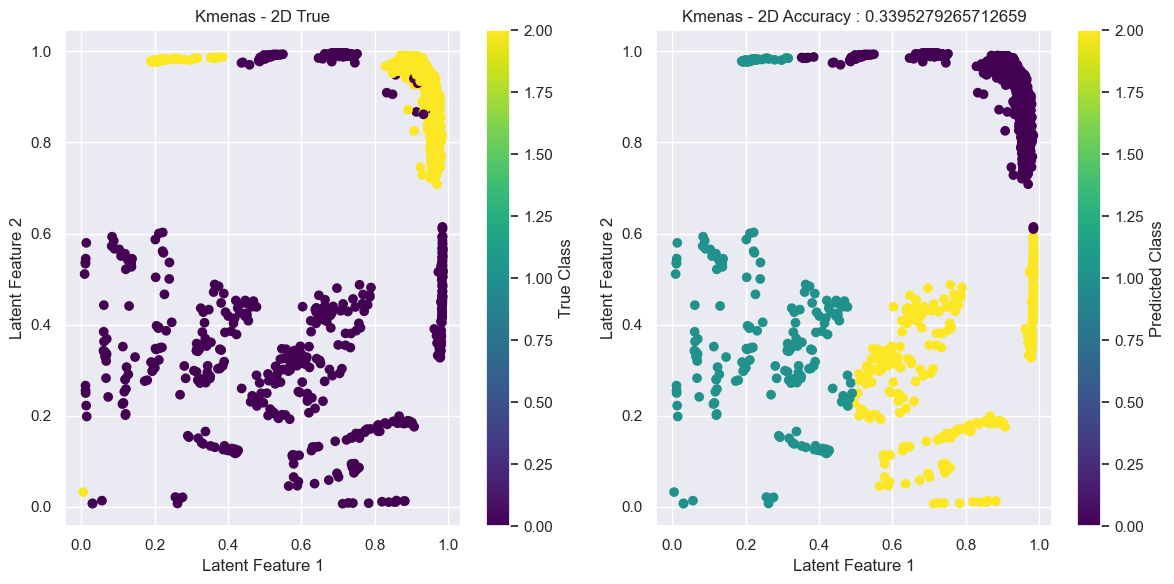

In [135]:
acc_2d=adjusted_rand_score(np.array(y_test2-1).ravel(),kmeans_2d_labels)
plot_clusters_2d(x_enc_2d,y_test2.values-1, kmeans_2d_labels, 'Kmenas - 2D',acc_2d)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


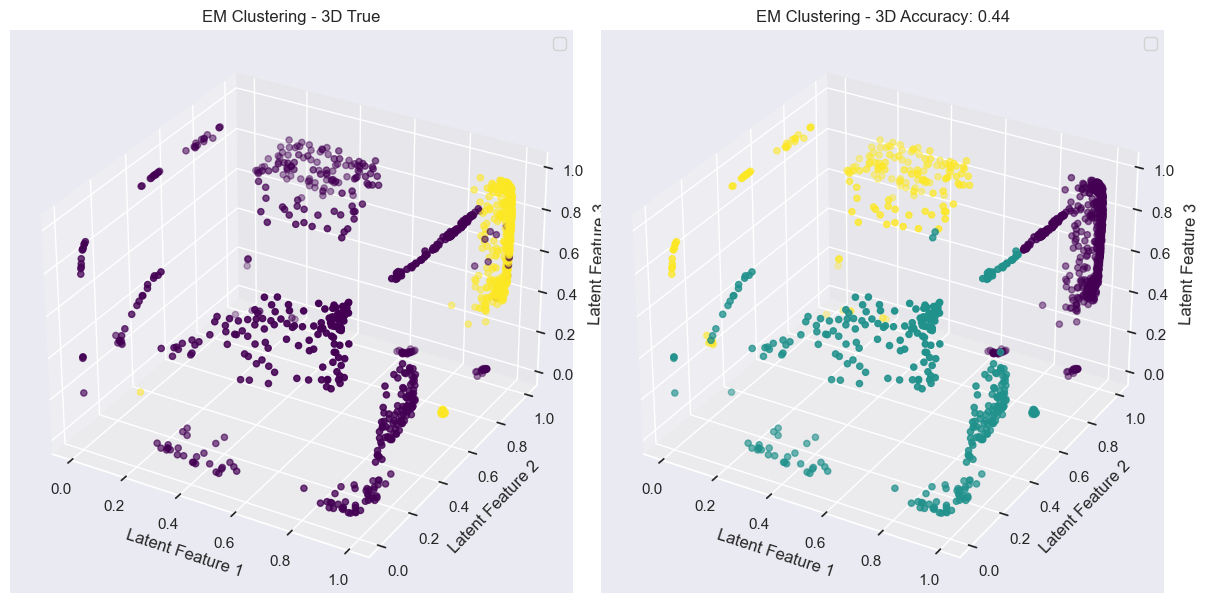

In [136]:
acc_3d=adjusted_rand_score(np.array(y_test2-1).ravel(),kmeans_3d_labels)
plot_clusters_3d(x_enc_3d, y_test2.values-1, kmeans_3d_labels, 'EM Clustering - 3D',acc_3d)



#### <font color='red'> EM Alghoritm (Gaussian Mixture)

In [137]:
em_autoencoder_2d = GaussianMixture(n_components=3, random_state=42).fit(x_enc_2d)
em_autoencoder_3d = GaussianMixture(n_components=3, random_state=42).fit(x_enc_3d)


In [138]:
em_labels_autoencoder_2d = em_autoencoder_2d.predict(x_enc_2d)
em_labels_autoencoder_3d = em_autoencoder_3d.predict(x_enc_3d)

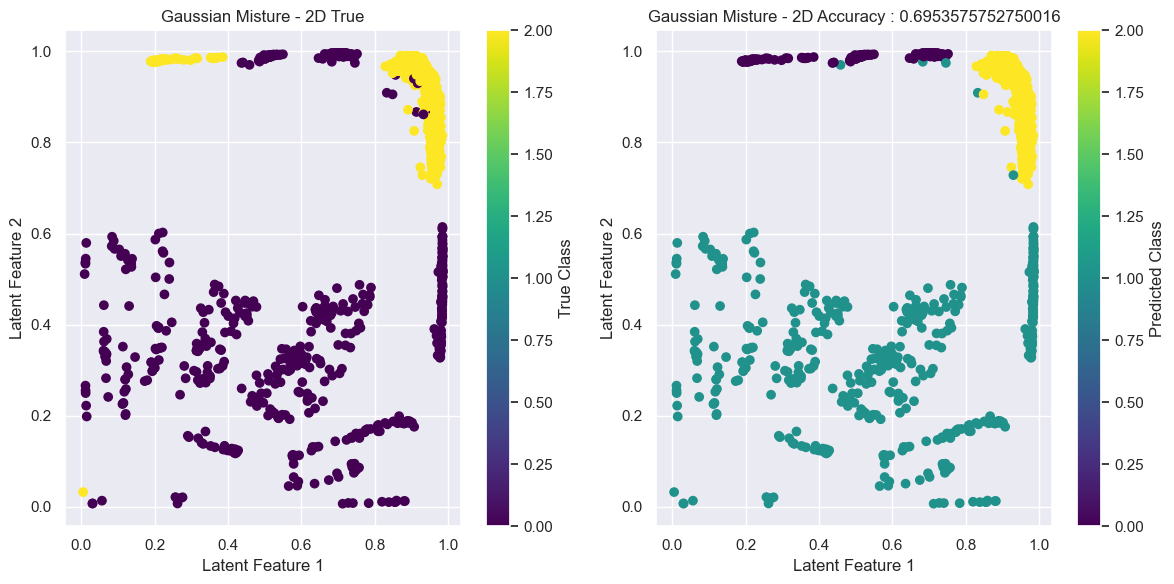

In [139]:
acc_2d=adjusted_rand_score(np.array(y_test2-1).ravel(),em_labels_autoencoder_2d)
plot_clusters_2d(x_enc_2d,y_test2.values-1, em_labels_autoencoder_2d, 'Gaussian Misture - 2D',acc_2d)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


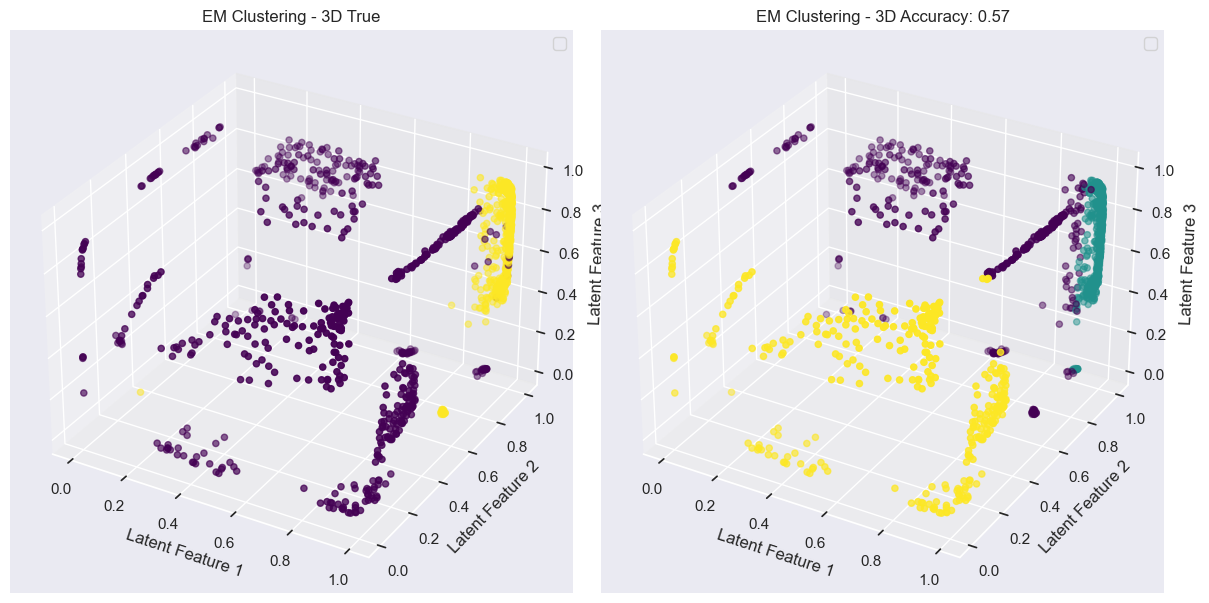

In [140]:
acc_3d=adjusted_rand_score(np.array(y_test2-1).ravel(),em_labels_autoencoder_3d)
plot_clusters_3d(x_enc_3d, y_test2.values-1, em_labels_autoencoder_3d, 'EM Clustering - 3D',acc_3d)


#### In this section, clustering was done by running k_means and Gaussian Mixture algorithms in 2 and 3 dimensions. Then, these were plotted for 2D and 3D and the difference between the real and predicted classes was observed.

#### As a result there are actually mostly 1 to 3 labels, and 2 is very few. I also tried n_cluster as 2, but I got a much worse result.

##### In addition, a visible difference in accuracy of the data encoded in 2D compared to 3D was observed.